**Experiment #3**

**The open question is: what if the `number_of_objects` and `class_weight` remain constant, but the distance between the normal distributions varies?**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.labelpad'] = 8
rcParams['font.size'] = 10
rcParams['font.family'] = 'sans-serif'
rcParams['legend.fontsize'] = 10
rcParams['axes.labelsize'] = 10
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['xtick.labelsize'] = 10

In [2]:
from numpy import __version__
print('numpy: {}'.format(__version__))
from sklearn import __version__
print('sklearn: {}'.format(__version__))

numpy: 1.24.1
sklearn: 1.2.0


In [3]:
locs = list(range(6, 15))
locs

[6, 7, 8, 9, 10, 11, 12, 13, 14]

In [4]:
from utils import get_distributions, get_metrics, seeds, class_weights, number_of_objects, get_curves, plot_curves

In [5]:
seeds

[978,
 672,
 821,
 445,
 488,
 449,
 753,
 962,
 874,
 287,
 257,
 598,
 100,
 136,
 305,
 376,
 548,
 229,
 265,
 425]

In [6]:
class_weights

[0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]

In [7]:
number_of_objects

array([  100000.,   200000.,   400000.,   800000.,  1000000.,  2000000.,
        4000000.,  8000000., 10000000., 15000000., 20000000., 25000000.,
       30000000., 35000000., 40000000., 45000000., 50000000.])

In [8]:
def get_results(n_objects, class_weight):
    """Get maximum, minimum and mean AUCs
    for the specific `class_weight`, `n_objects` and `loc`.
    """
    out = {
        'ROC': {'max': [], 'min': [], 'mean': []},
        'PR': {'max': [], 'min': [], 'mean': []},
    }

    for loc in locs:
        print('{} #'.format(loc), end='')
        roc_scores, pr_scores = [], []
        for seed in seeds:
            print('-', end='')
            roc, pr = get_metrics(
                get_distributions(n_objects, class_weight, seed=seed, loc=loc)
            )
            roc_scores.append(roc)
            pr_scores.append(pr)
        #
        out['ROC']['max'].append(max(roc_scores))
        out['ROC']['min'].append(min(roc_scores))
        out['ROC']['mean'].append(np.mean(roc_scores))
        #
        out['PR']['max'].append(max(pr_scores))
        out['PR']['min'].append(min(pr_scores))
        out['PR']['mean'].append(np.mean(pr_scores))
        #
        print()
        #
    return out

In [9]:
def plot(out):
    figure, axis = plt.subplots(1, 2, figsize=(14, 7))
    #
    for idx, metric in enumerate(('ROC', 'PR')):
        axis[idx].fill_between(locs, y1=out[metric]['max'], y2=out[metric]['min'], alpha=0.2, color='silver')
        axis[idx].plot(locs, out[metric]['mean'], 'ko--', lw=1.3, mfc='white')
        axis[idx].grid(True, alpha=0.3, aa=True, ls=':', lw=1.1)
        axis[idx].set_ylabel('AUC {}'.format(metric))
        axis[idx].set_xlabel('Center of the right distribution')
    plt.tight_layout()

## `class_weight` = 40% & `number_of_objects` = 100,000

6 #--------------------
7 #--------------------
8 #--------------------
9 #--------------------
10 #--------------------
11 #--------------------
12 #--------------------
13 #--------------------
14 #--------------------


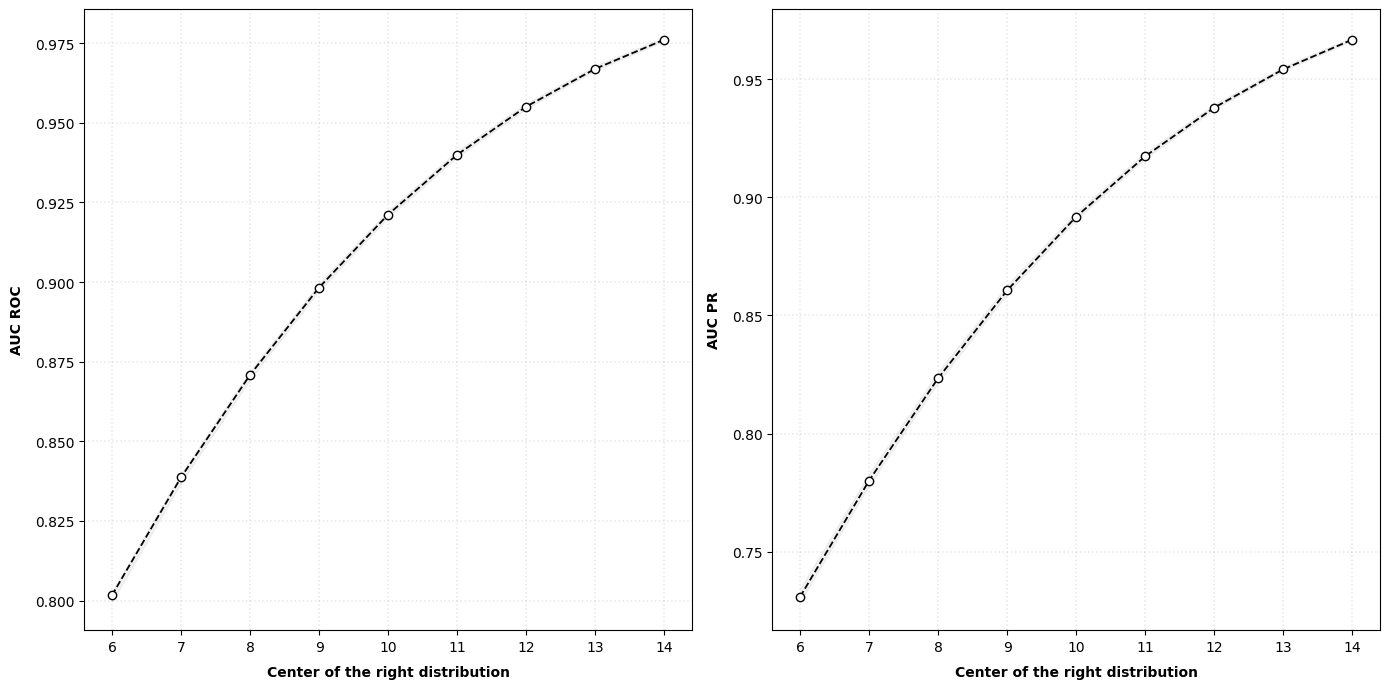

In [10]:
plot(get_results(n_objects=1e+5, class_weight=0.4))
plt.savefig('figures/fig10.png', dpi=300)

### `loc` = 6

**Let's compare the ROC and PR curves at loc equal to 6 at the `seeds` corresponding to the minimum and maximum AUC ROC values.**

--------------------

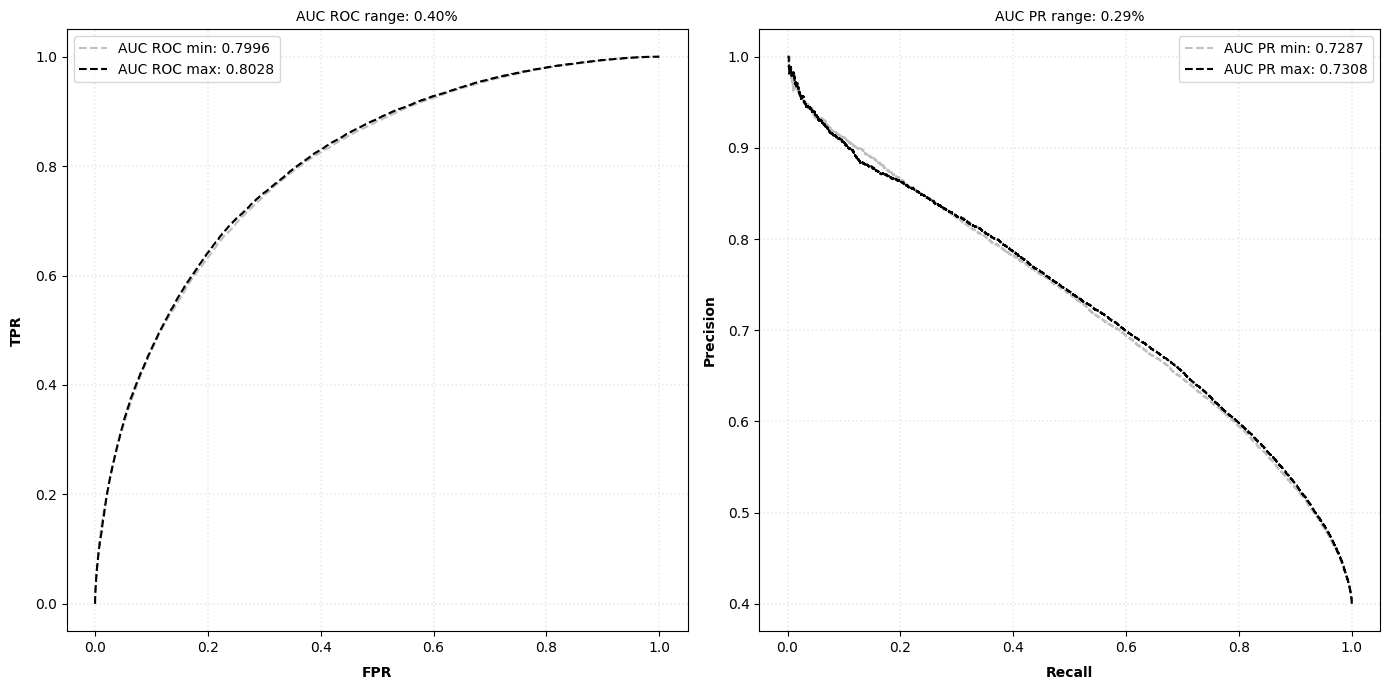

In [11]:
plot_curves(*get_curves(n_objects=1e+5, class_weight=0.4, loc=6))
plt.savefig('figures/fig11.png', dpi=300)

### `loc` = 14

**Let's do the same thing, but this time for `loc` equal to 14.**

--------------------

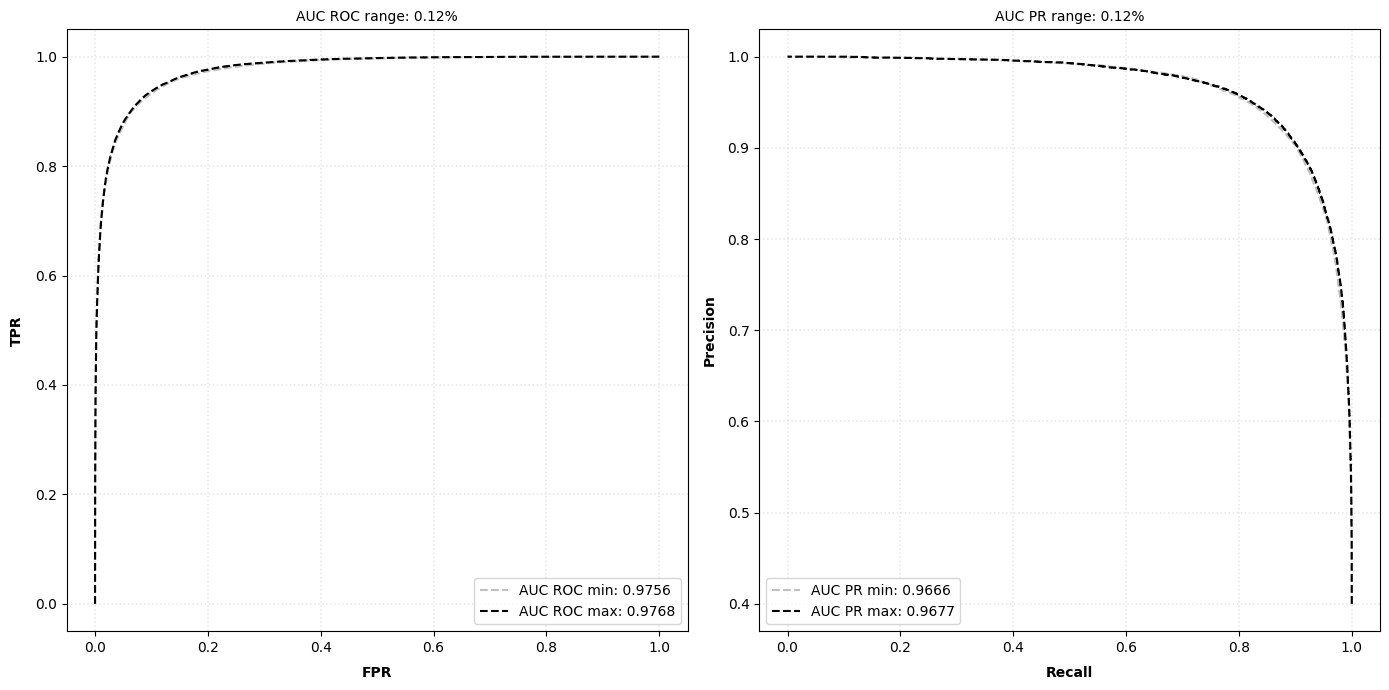

In [12]:
plot_curves(*get_curves(n_objects=1e+5, class_weight=0.4, loc=14))

## `class_weight` = 40% & `number_of_objects` = 50,000,000

6 #--------------------
7 #--------------------
8 #--------------------
9 #--------------------
10 #--------------------
11 #--------------------
12 #--------------------
13 #--------------------
14 #--------------------


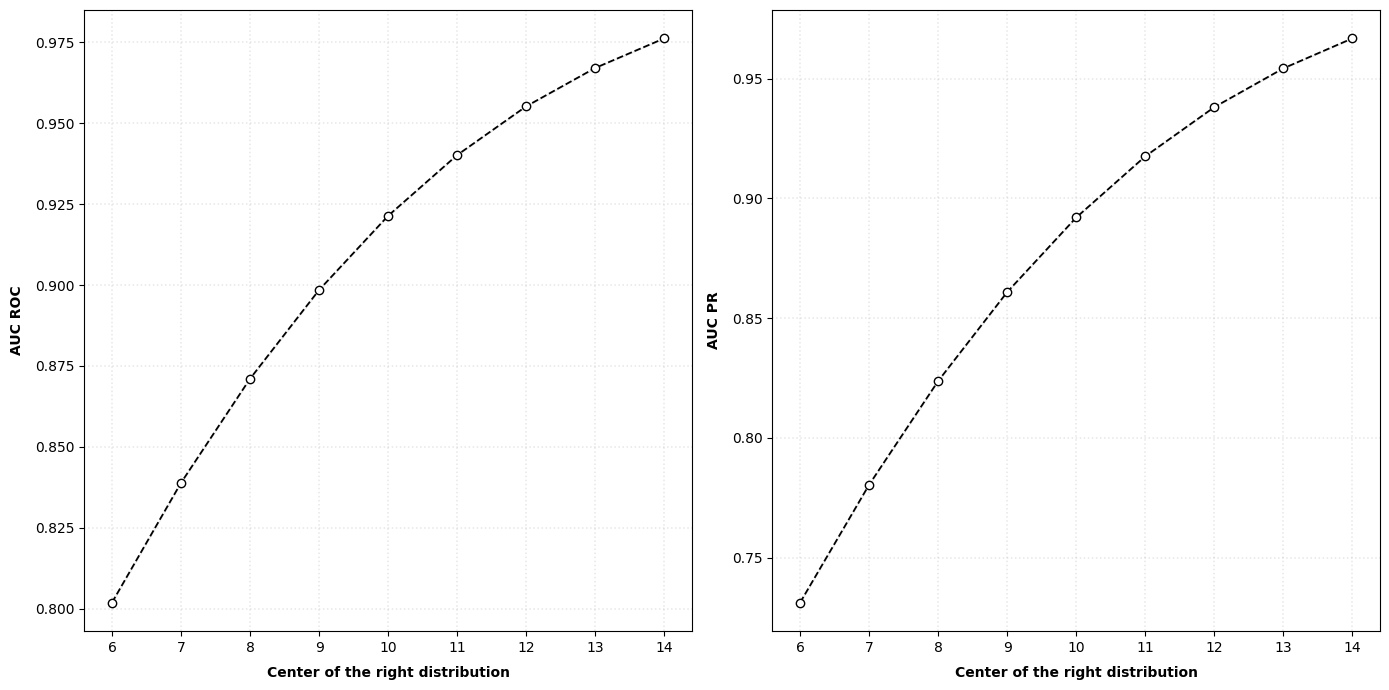

In [13]:
plot(get_results(n_objects=5e+7, class_weight=0.4))

### `loc` = 6

**Let's compare the ROC and PR curves at loc equal to 6 at the `seeds` corresponding to the minimum and maximum AUC ROC values.**

--------------------

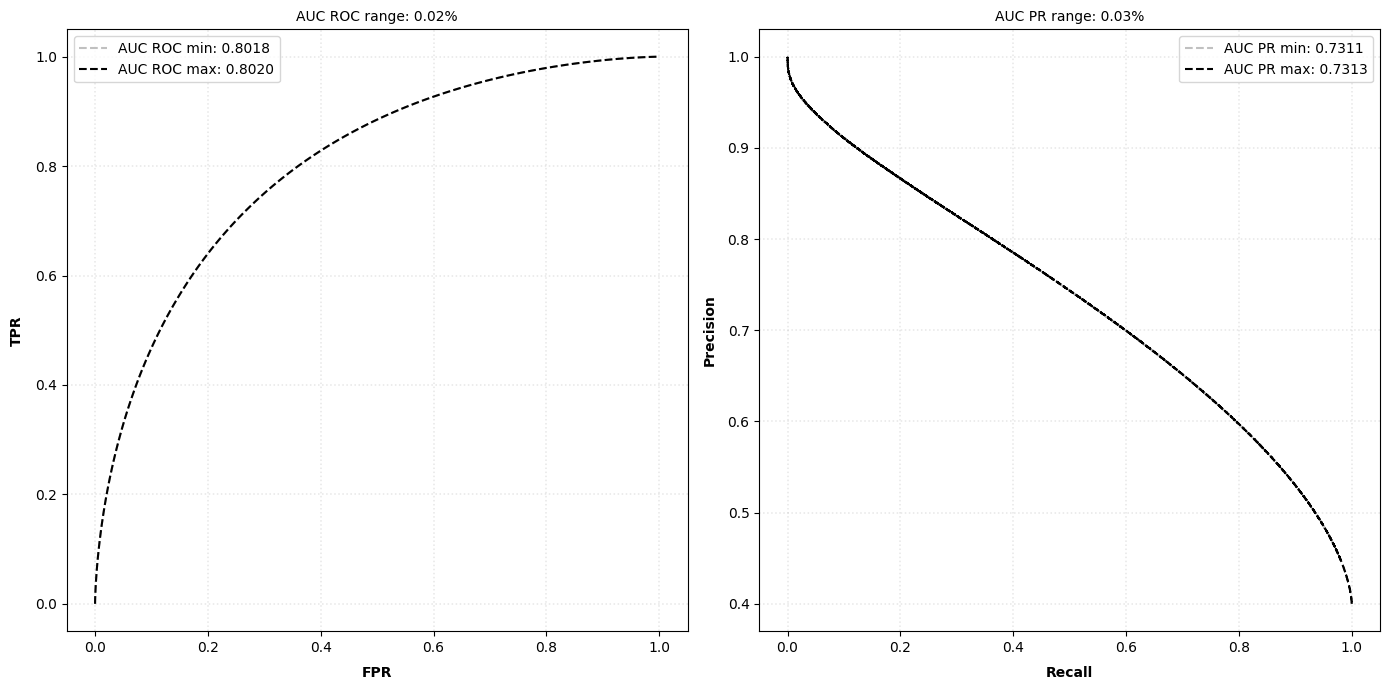

In [14]:
plot_curves(*get_curves(n_objects=5e+7, class_weight=0.4, loc=6))

### `loc` = 14

**Let's do the same thing, but this time for `loc` equal to 14.**

--------------------

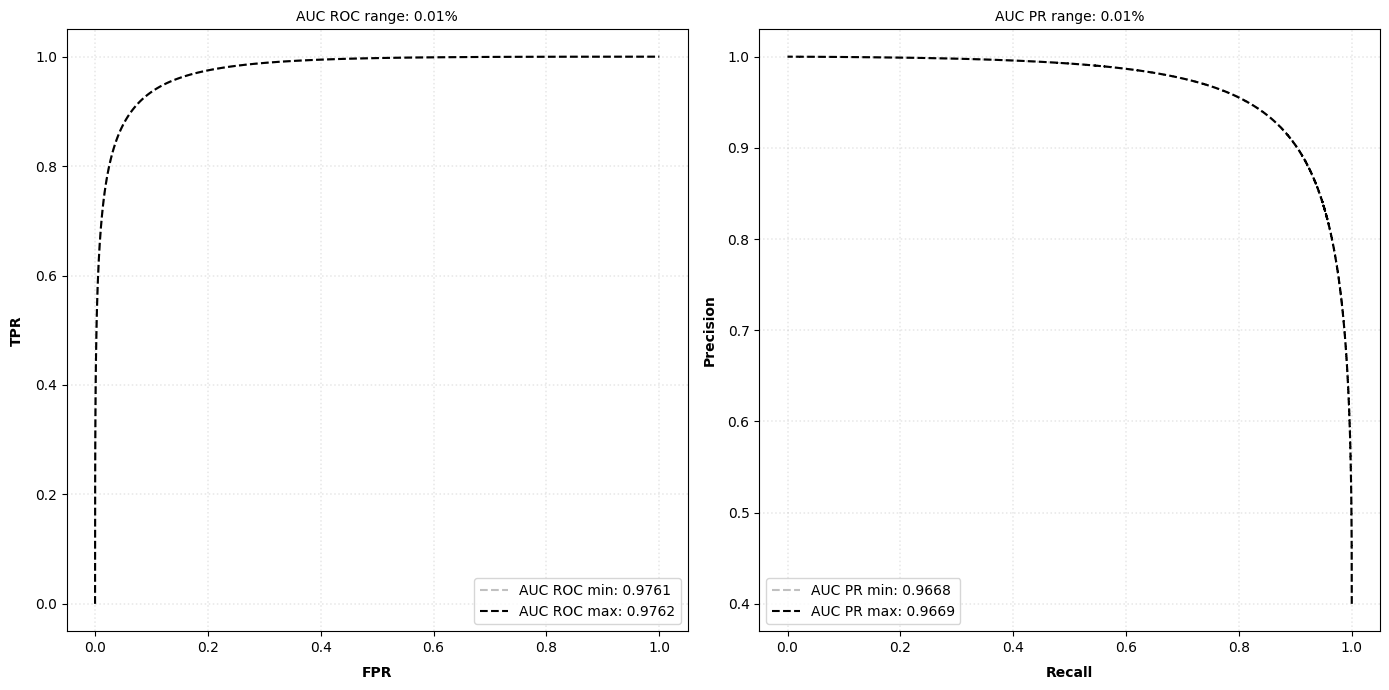

In [15]:
plot_curves(*get_curves(n_objects=5e+7, class_weight=0.4, loc=14))

## `class_weight` = 0.05% & `number_of_objects` = 100,000

6 #--------------------
7 #--------------------
8 #--------------------
9 #--------------------
10 #--------------------
11 #--------------------
12 #--------------------
13 #--------------------
14 #--------------------


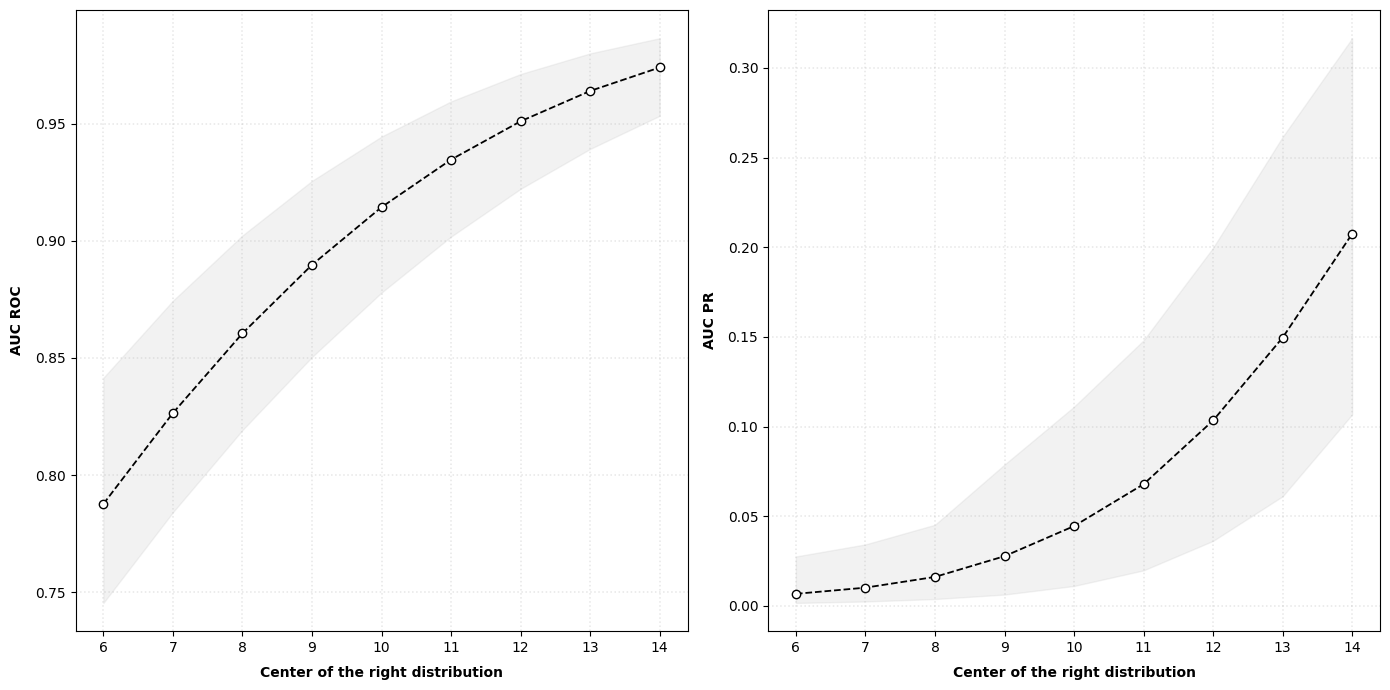

In [16]:
plot(get_results(n_objects=1e+5, class_weight=0.0005))
plt.savefig('figures/fig12.png', dpi=300)

### `loc` = 6

**Let's compare the ROC and PR curves at loc equal to 6 at the `seeds` corresponding to the minimum and maximum AUC ROC values.**

--------------------

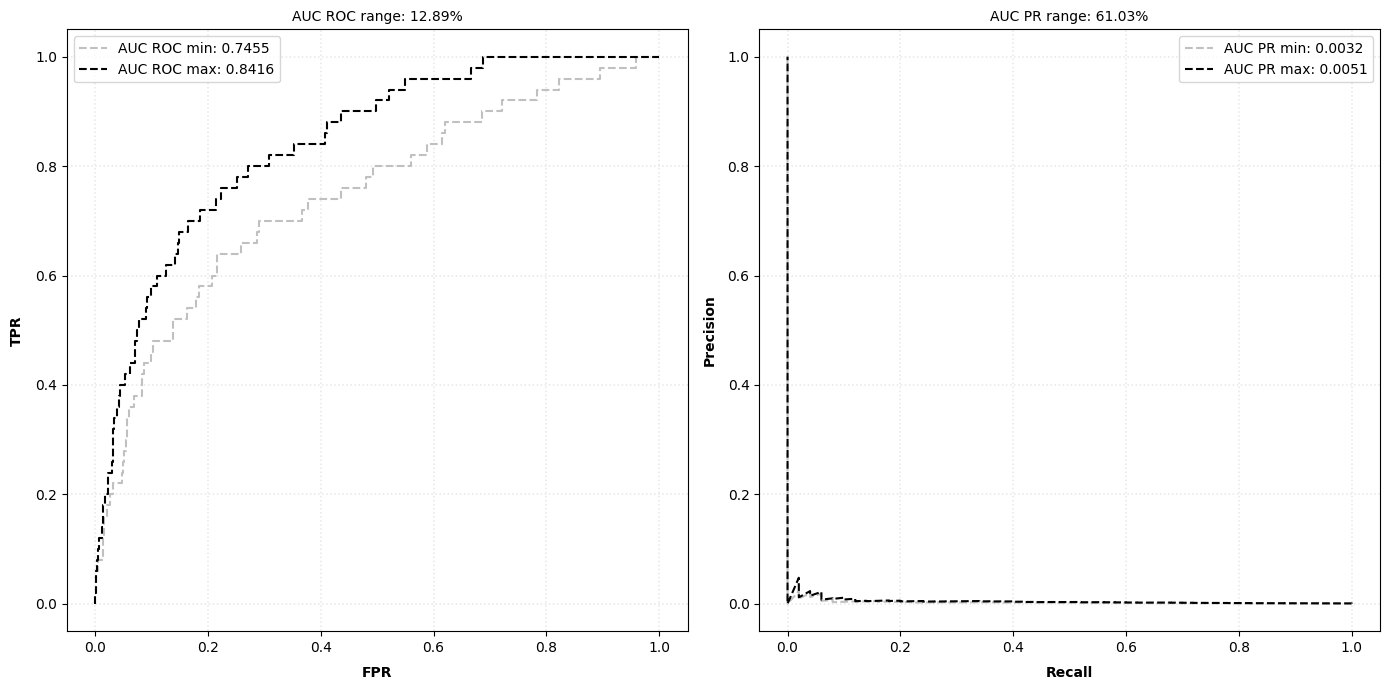

In [17]:
plot_curves(*get_curves(n_objects=1e+5, class_weight=0.0005, loc=6))
plt.savefig('figures/fig13.png', dpi=300)

### `loc` = 14

**Let's do the same thing, but this time for `loc` equal to 14.**

--------------------

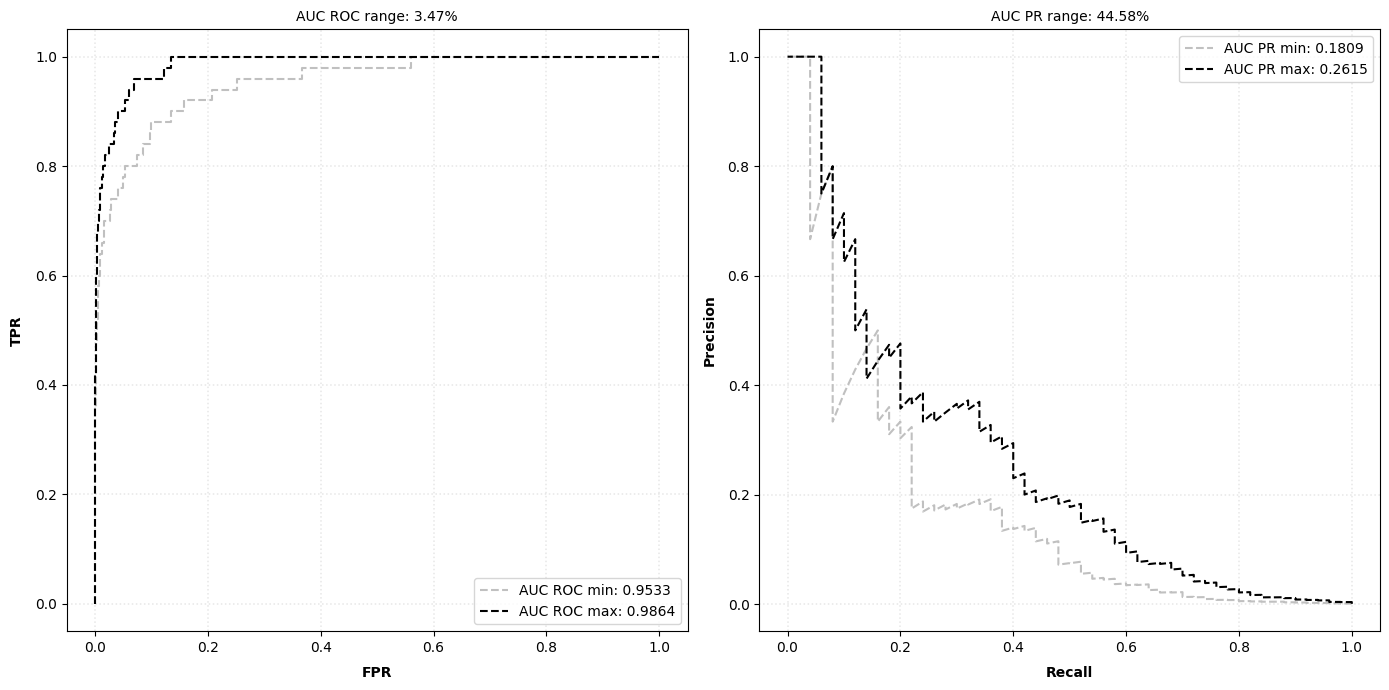

In [18]:
plot_curves(*get_curves(n_objects=1e+5, class_weight=0.0005, loc=14))
plt.savefig('figures/fig14.png', dpi=300)

## `class_weight` = 0.05% & `number_of_objects` = 50,000,000

6 #--------------------
7 #--------------------
8 #--------------------
9 #--------------------
10 #--------------------
11 #--------------------
12 #--------------------
13 #--------------------
14 #--------------------


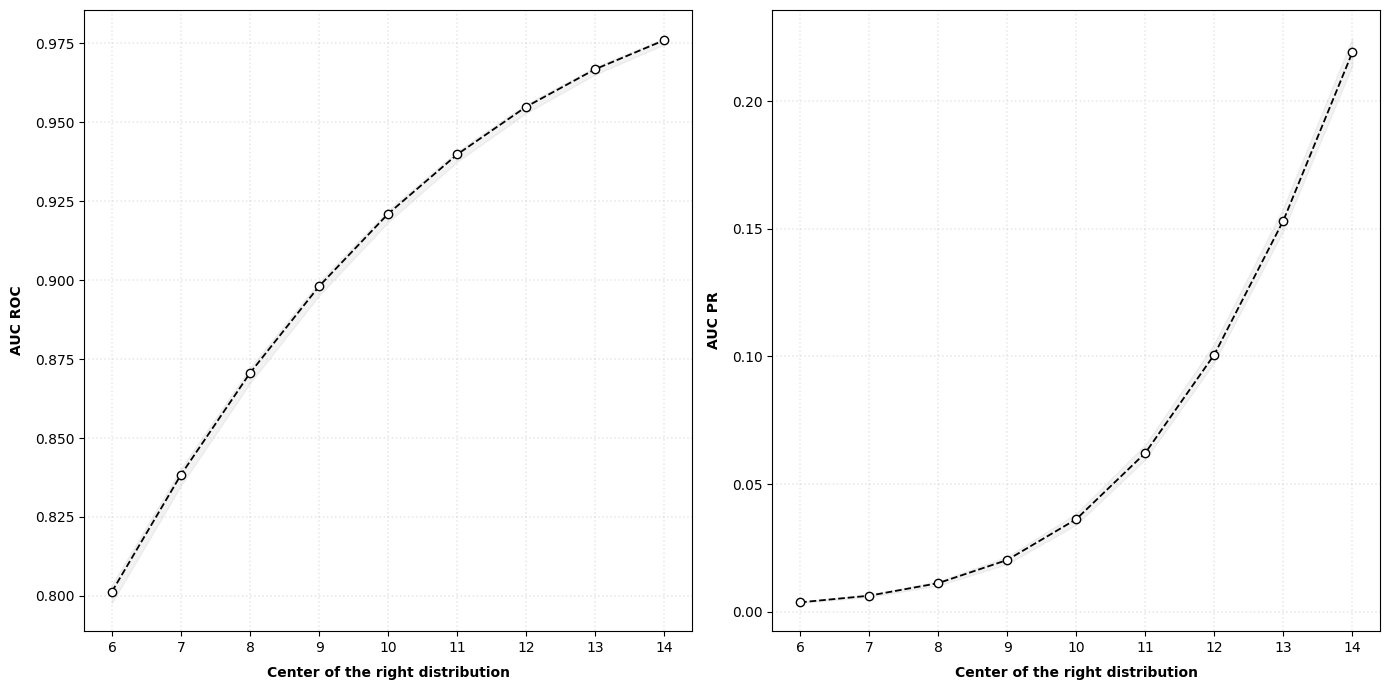

In [19]:
plot(get_results(n_objects=5e+7, class_weight=0.0005))

### `loc` = 6

**Let's compare the ROC and PR curves at loc equal to 6 at the `seeds` corresponding to the minimum and maximum AUC ROC values.**

--------------------

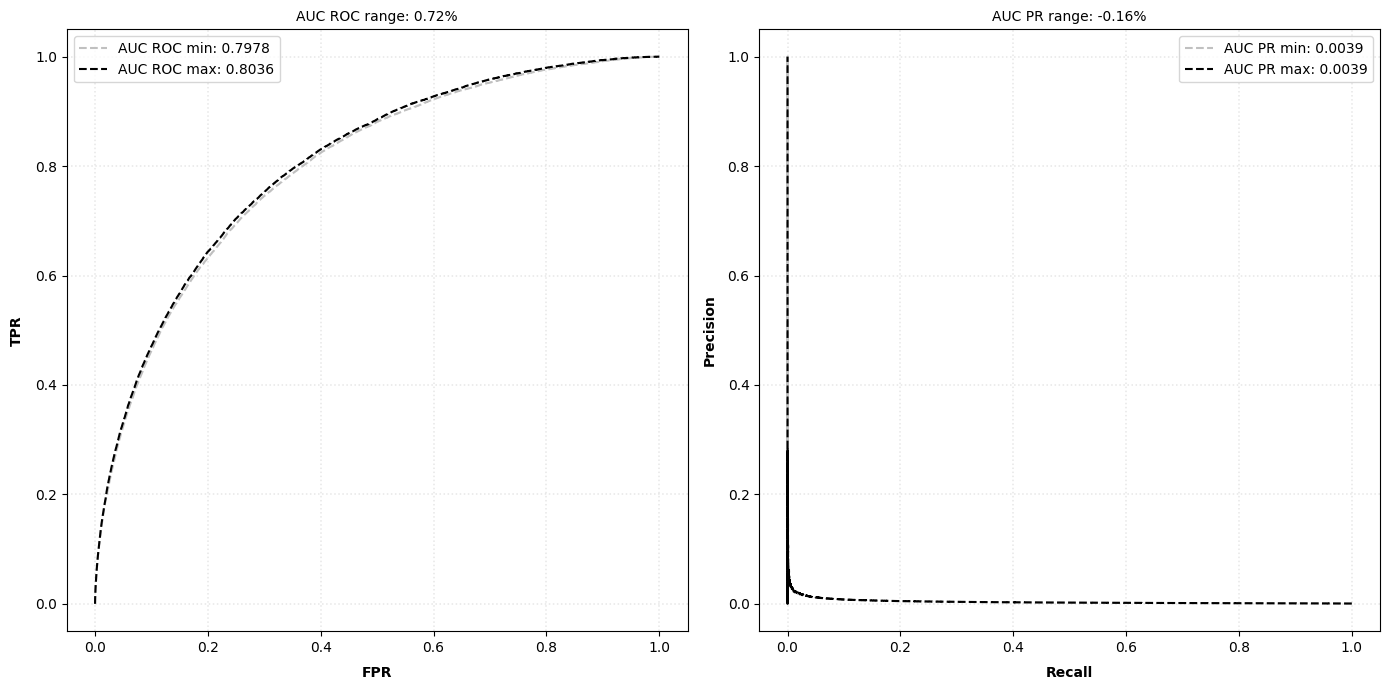

In [10]:
plot_curves(*get_curves(n_objects=5e+7, class_weight=0.0005, loc=6))

### `loc` = 10

**Let's do the same thing, but this time for `loc` equal to 10.**

--------------------

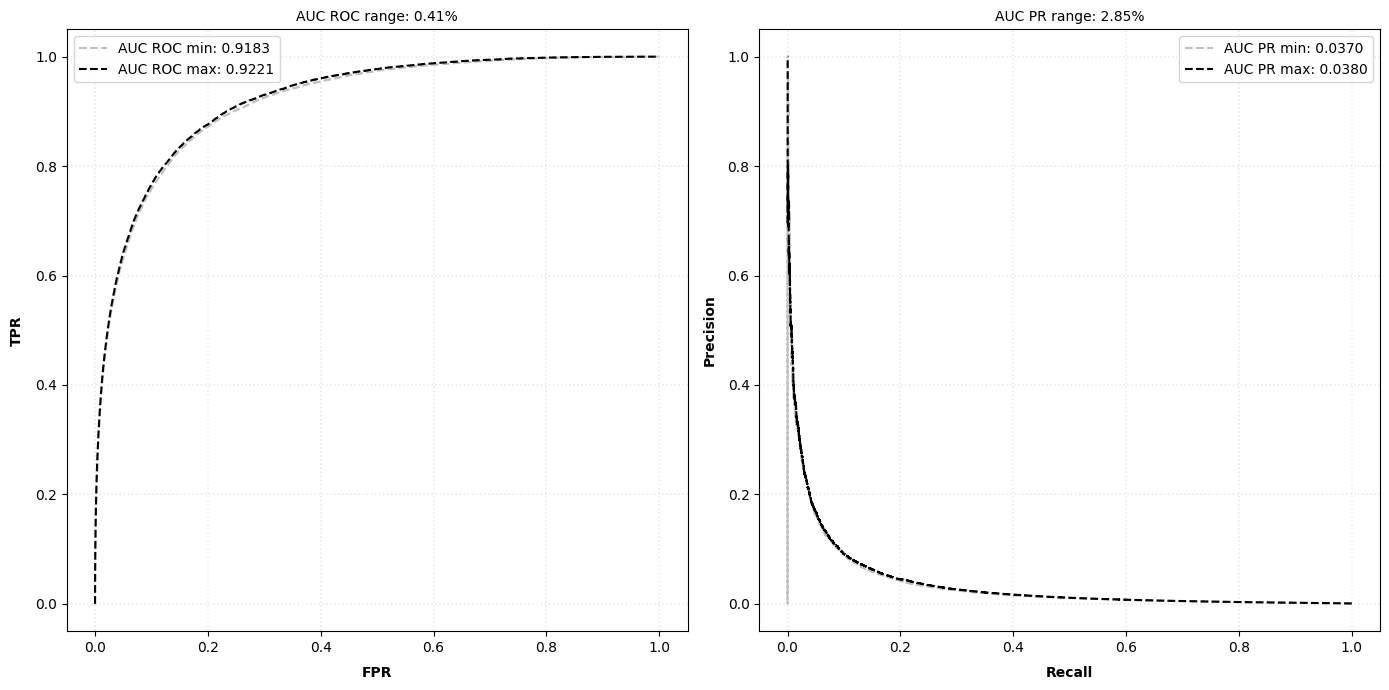

In [11]:
plot_curves(*get_curves(n_objects=5e+7, class_weight=0.0005, loc=10))

### `loc` = 14

**Let's do the same thing, but this time for `loc` equal to 14.**

--------------------

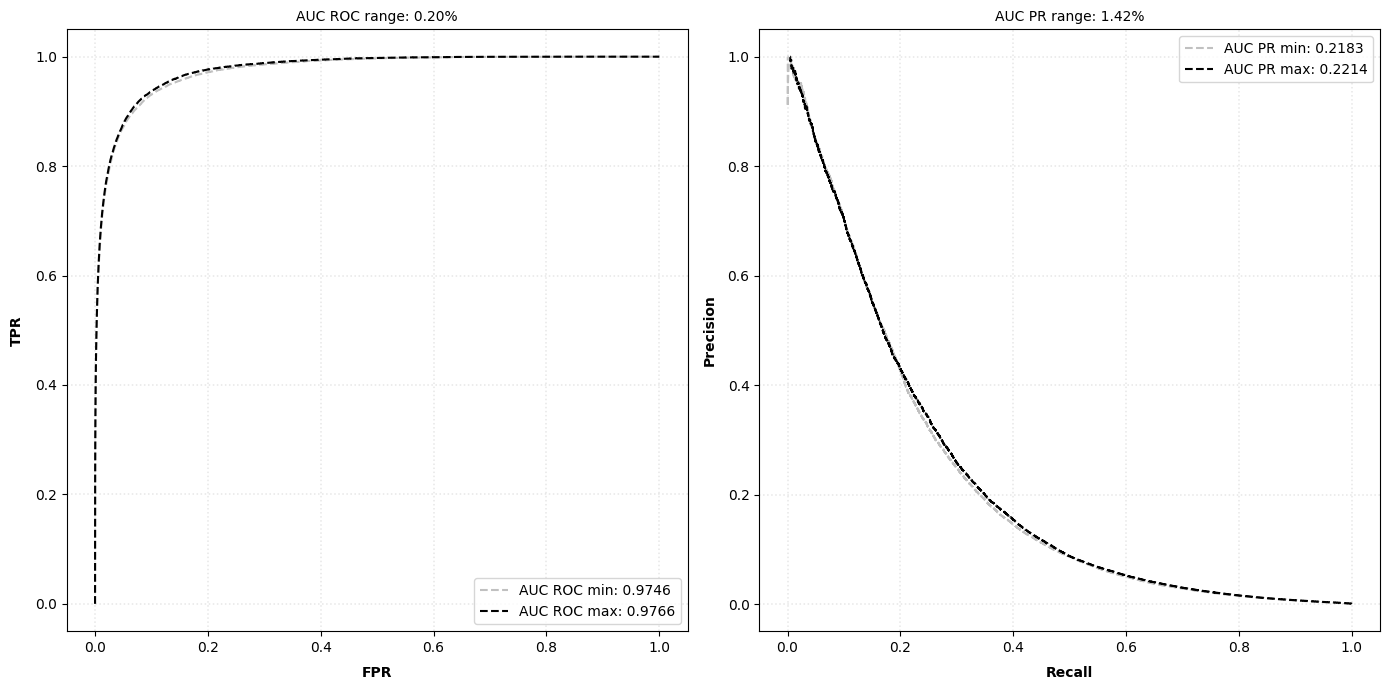

In [10]:
plot_curves(*get_curves(n_objects=5e+7, class_weight=0.0005, loc=14))
plt.savefig('figures/fig15.png', dpi=300)